In [1]:
import pathlib
import numpy as np
from fytok.Tokamak import Tokamak
from spdm.data.Function import Function
from spdm.view import View as sp_view

input_path = pathlib.Path("/home/salmon/workspace/fytok_data/data/15MA inductive - burn")
output_path = f"/home/salmon/workspace/output"

2023-11-04 10:35:52,653 [   fytok]     INFO: 
#######################################################################################################################
    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences)
            
 url: https://gitee.com/openfusion/fytok_tutorial 
      https://github.com/fusion-yun/fytok_tutorial

 ontology = imas/3, version = 0.2.1 ( extension=0.2.2.dev11+g706f667, imas_version=v3_38_1_dirty ) 

 Run by salmon on Surface at 2023-11-04T10:35:52.653230

#######################################################################################################################



In [2]:

tokamak = Tokamak(f"file+iterprofiles://{next(input_path.glob('*.xls')).as_posix()}",
                  f"file+geqdsk://{next(input_path.glob('**/*.txt')).as_posix()}",
                  device="iter",
                  transport_solver={"code":  {"name": "fytrans",
                                              "parameters": {
                                                  "bvp_rms_mask": [0.96],
                                                  "hyper_diff": 0.0
                                              }}})

core_profiles_1d = tokamak.core_profiles.time_slice.current.profiles_1d
core_profiles_1d.electrons["density_thermal"] = 1.0e19

tokamak.transport_solver.refresh(
    equilibrium=tokamak.equilibrium,
    core_profiles=tokamak.core_profiles,
    core_transport=tokamak.core_transport,
    core_sources=tokamak.core_sources,
)

2023-11-04 10:35:52,793 [   fytok]     INFO: Load module spdm.plugins.data.plugin_xml
2023-11-04 10:35:53,116 [   fytok]     INFO: Load module spdm.plugins.data.plugin_iterprofiles
2023-11-04 10:35:53,202 [   fytok]     INFO: Load module spdm.plugins.data.plugin_geqdsk
2023-11-04 10:35:53,253 [   fytok]     INFO: Load module fytok.plugins.transport_solver_numerics.fytrans
2023-11-04 10:35:54,123 [   fytok]     INFO: Load module fytok.plugins.equilibrium.eq_analyze
2023-11-04 10:35:58,204 [   fytok]    DEBUG: /home/salmon/workspace/fytok/python/fytok/plugins/transport_solver_numerics/fytrans.py:500:_solve: hyper_diff=0.0
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
Singular Jacobian encountered when solving the collocation system on iteration 1. 
Maximum relative residual: 1.39e+02 
Maximum boundary residual: nan
2023-11-04 10:36:08,499 [   fytok]    ERROR: /home/salmon/workspace/fytok/python/fytok/plugins/transport_solver_numerics/fytrans.py:595:_solve: S

/home/salmon/workspace/fytok/SpDM/python/spdm/data/Expression.py:271: RuntimeWarning: divide by zero encountered in divide
  value = func(*xargs, **kwargs)
/home/salmon/workspace/fytok/SpDM/python/spdm/data/Expression.py:271: RuntimeWarning: invalid value encountered in multiply
  value = func(*xargs, **kwargs)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


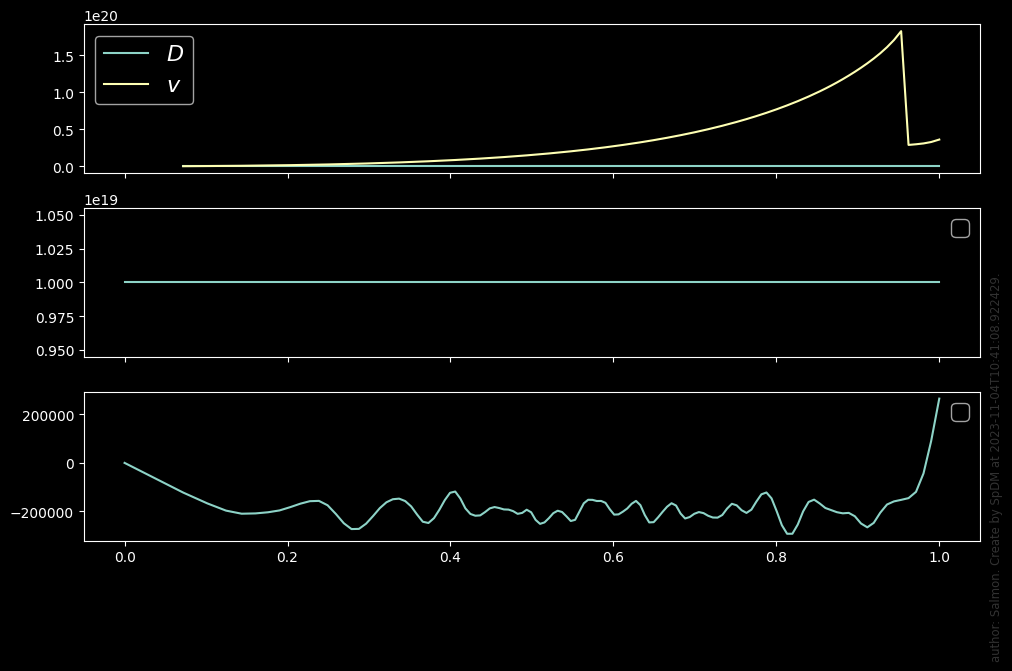

In [7]:
solver_1d = tokamak.transport_solver.time_slice.current.solver_1d
equ = solver_1d.equation[0]
a, b, c, d, e, f, g = equ.coefficient
x = solver_1d.grid.rho_tor_norm
y = equ.primary_quantity.profile
yp = equ.primary_quantity.d_dr
flux = equ.primary_quantity.flux
dflux = equ.primary_quantity.dflux_dr
fig = sp_view.plot([
    # * equ.coefficient,
    [
        (d*yp, "$D$"),
        (e*y,   "$v$"),
        # (flux,   f"$\Gamma$"),
        # (-(c*(f - g * y)).I, r"$S$"), # $\int c*(f - g \cdot y)$
        # (-d*yp+e*y-(c*(f - g * y)).I, "residual"),
    ],

    y, yp

    # [

    #     (dflux, {"label": r"$d\Gamma$"}),
    #     # (Function(flux, x).d(), r"$d\Gamma$"),
    #     ((c*(f - g * y)), r"$c*(f - g \cdot y)$"),
    # ],
],
    x_axis=x)

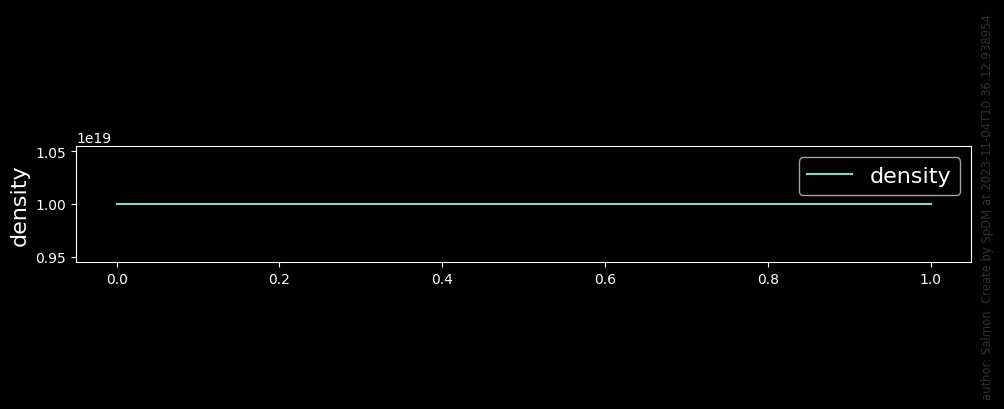

In [4]:
fig = sp_view.plot(tokamak.core_profiles.time_slice.current.profiles_1d.electrons.density,
                   x_axis=tokamak.core_profiles.time_slice.current.profiles_1d.grid.rho_tor_norm)

In [8]:
J=debug_info[0].todense()

In [9]:
J

matrix([[        nan,         nan,         nan, ...,  0.        ,
          0.        ,  0.        ],
        [        nan,         nan,         nan, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.99972843, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -1.        ,
          0.        ,  1.        ],
        [        nan,         nan,  0.        , ...,  0.        ,
                 nan,         nan],
        [ 0.        ,         nan,  0.        , ...,  0.        ,
          0.        ,  1.        ]])